# Part 1: Data Preprocessing

Dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv

## Importing the libraries & dataset

In [554]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [555]:
dataset = pd.read_csv("train.csv")

## Data Exploration

In [556]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [557]:
dataset.shape

(1460, 81)

In [558]:
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [559]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [560]:
# statistical summary
dataset.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [561]:
#numerical columns
dataset.select_dtypes(include=['int64', 'float64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [562]:
len(dataset.select_dtypes(include=['int64', 'float64']).columns)

38

In [563]:
#categorical columns
dataset.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [564]:
len(dataset.select_dtypes(include='object').columns)

43

## Dealing with null values

In [565]:
dataset.isnull().values.any()

True

In [566]:
dataset.isnull().values.sum()

6965

In [567]:
dataset.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [568]:
#columns with null values
dataset.columns[dataset.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [569]:
len(dataset.columns[dataset.isnull().any()])

19

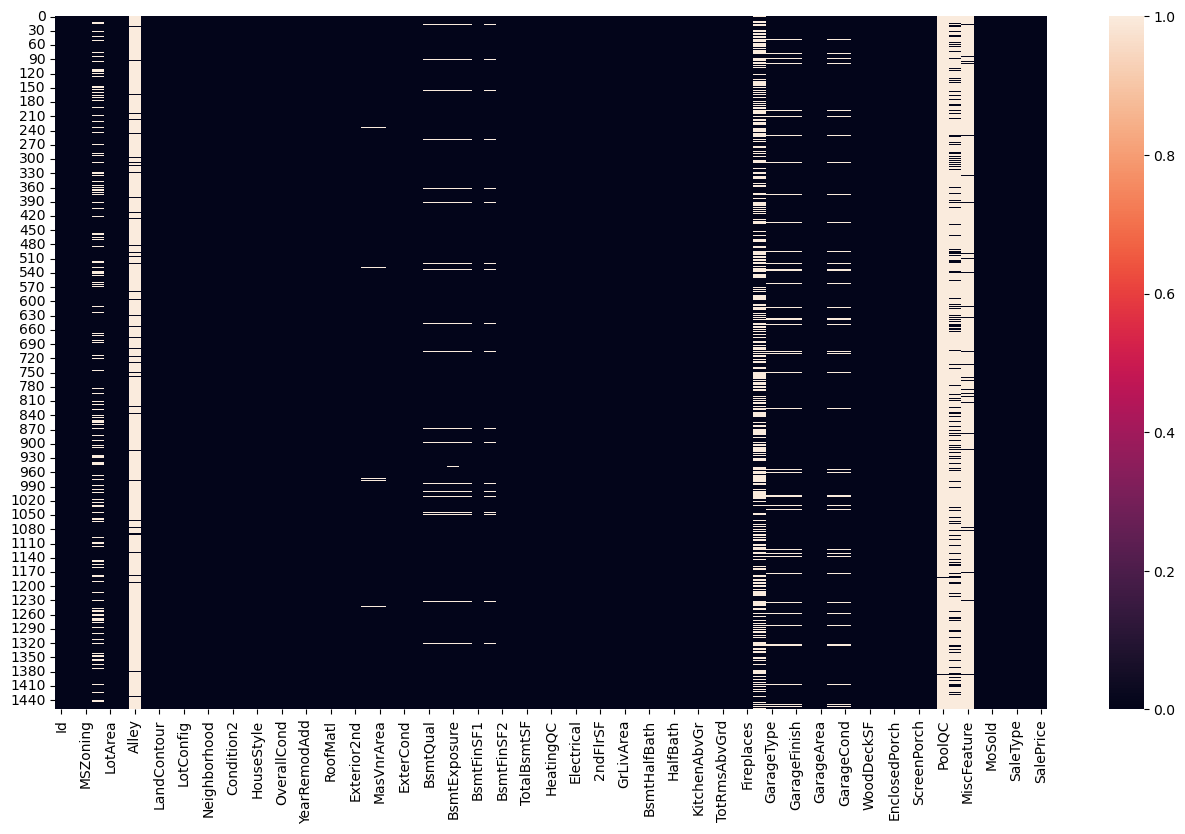

In [570]:
#null values with heatmap
plt.figure(figsize=(16,9))
sns.heatmap(dataset.isnull())
plt.show()

In [571]:
dataset.shape

(1460, 81)

In [572]:
null_percent = dataset.isnull().sum()/dataset.shape[0] * 100
# (missing values / total values) * 100

In [573]:
null_percent

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [574]:
#columns to drop (more than 50% null values)
cols_to_drop = null_percent[null_percent > 50].keys()

In [575]:
cols_to_drop

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [576]:
dataset = dataset.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'])

In [577]:
dataset.shape

(1460, 77)

In [578]:
# checking again the numerical values
dataset.columns[dataset.isnull().any()]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [579]:
len(dataset.columns[dataset.isnull().any()])
#Out of these Three columns are Numerical & rest are categorical

15

**Add column mean to numerical columns**

In [580]:
# Numerical Columns
# 'LotFrontage' , 'MasVnrArea' , 'GarageYrBlt'

In [581]:
dataset['LotFrontage'] = dataset['LotFrontage'].fillna(dataset['LotFrontage'].mean())
dataset['MasVnrArea'] = dataset['MasVnrArea'].fillna(dataset['MasVnrArea'].mean())
dataset['GarageYrBlt'] = dataset['GarageYrBlt'].fillna(dataset['GarageYrBlt'].mean())

In [582]:
len(dataset.columns[dataset.isnull().any()])

12

**Add column mode to categorical columns**

In [583]:
dataset.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [584]:
dataset.columns[dataset.isnull().any()]

Index(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [585]:
len(dataset.columns[dataset.isnull().any()])

12

In [586]:
col_names_list = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond']
for col_name in col_names_list:
  dataset[col_name] = dataset[col_name].fillna(dataset[col_name].mode()[0])


In [587]:
len(dataset.columns[dataset.isnull().any()])

0

In [588]:
dataset.isnull().values.any()

False

## Dist Plot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


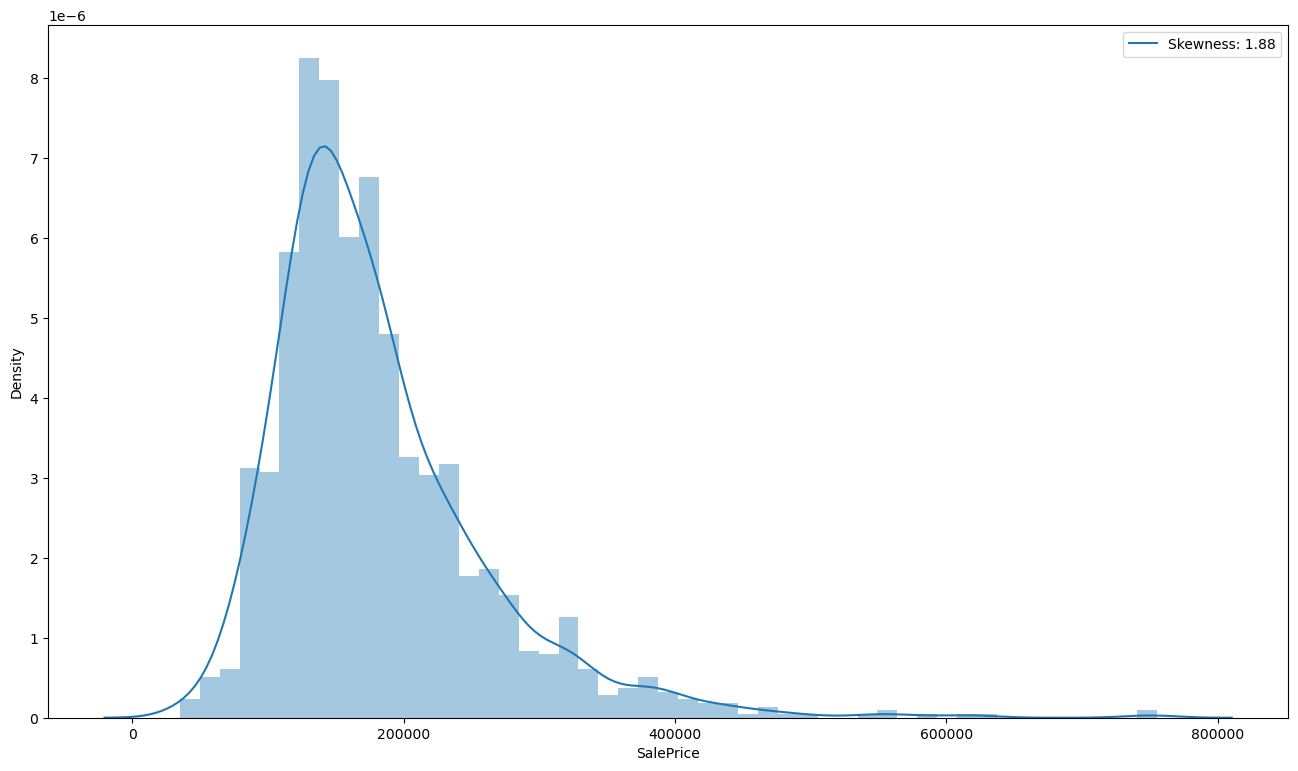

In [589]:
# distplot of target variable
plt.figure(figsize=(16,9))
bar = sns.distplot(dataset['SalePrice'])
bar.legend(["Skewness: {:.2f}".format(dataset['SalePrice'].skew())])
plt.show()

## Correlation Matrix

In [590]:
dataset_2 = dataset.drop(columns='SalePrice')

In [591]:
dataset_2.shape

(1460, 76)

<AxesSubplot:title={'center':'Correlated with SalePrice'}>

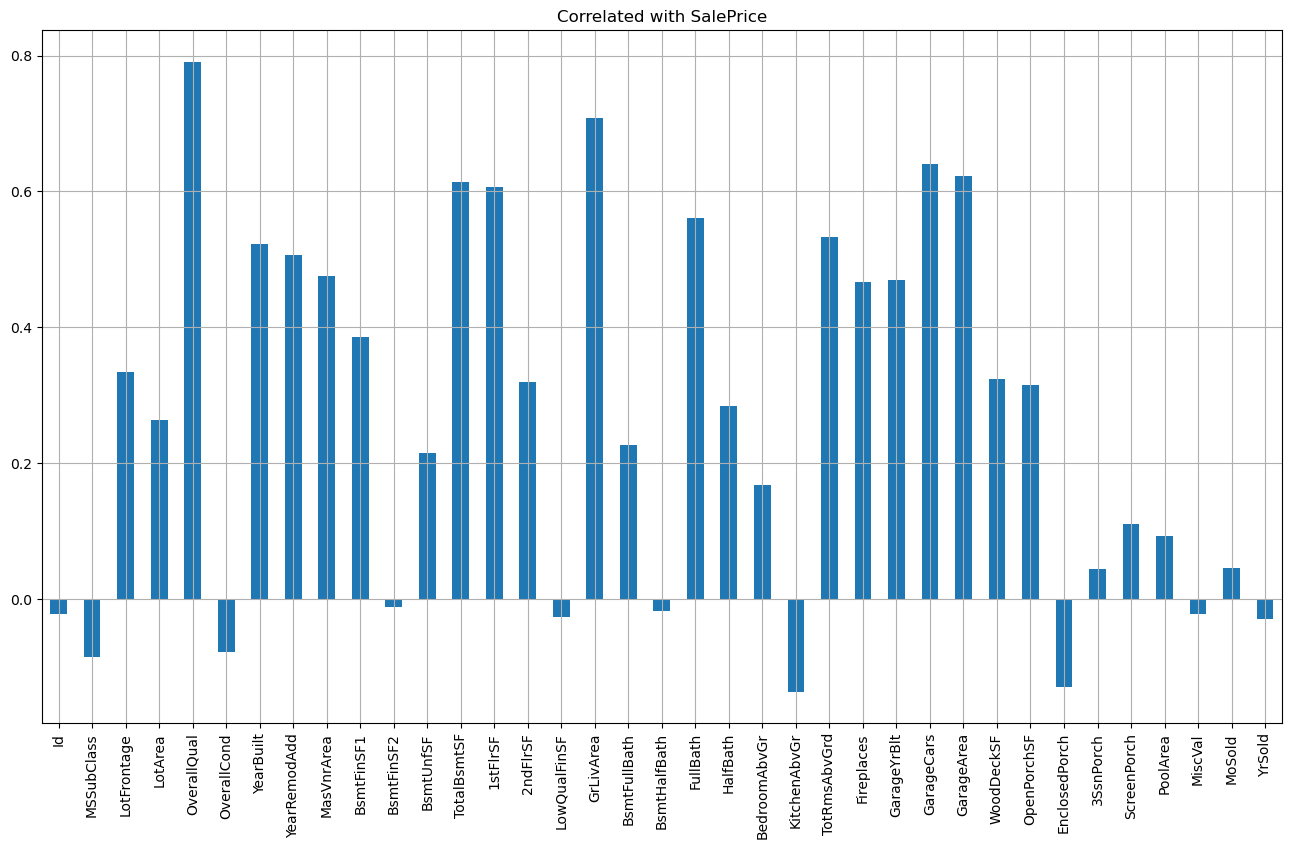

In [592]:
dataset_2.corrwith(dataset['SalePrice']).plot.bar(
    figsize = (16,9), title = "Correlated with SalePrice", grid = True
)

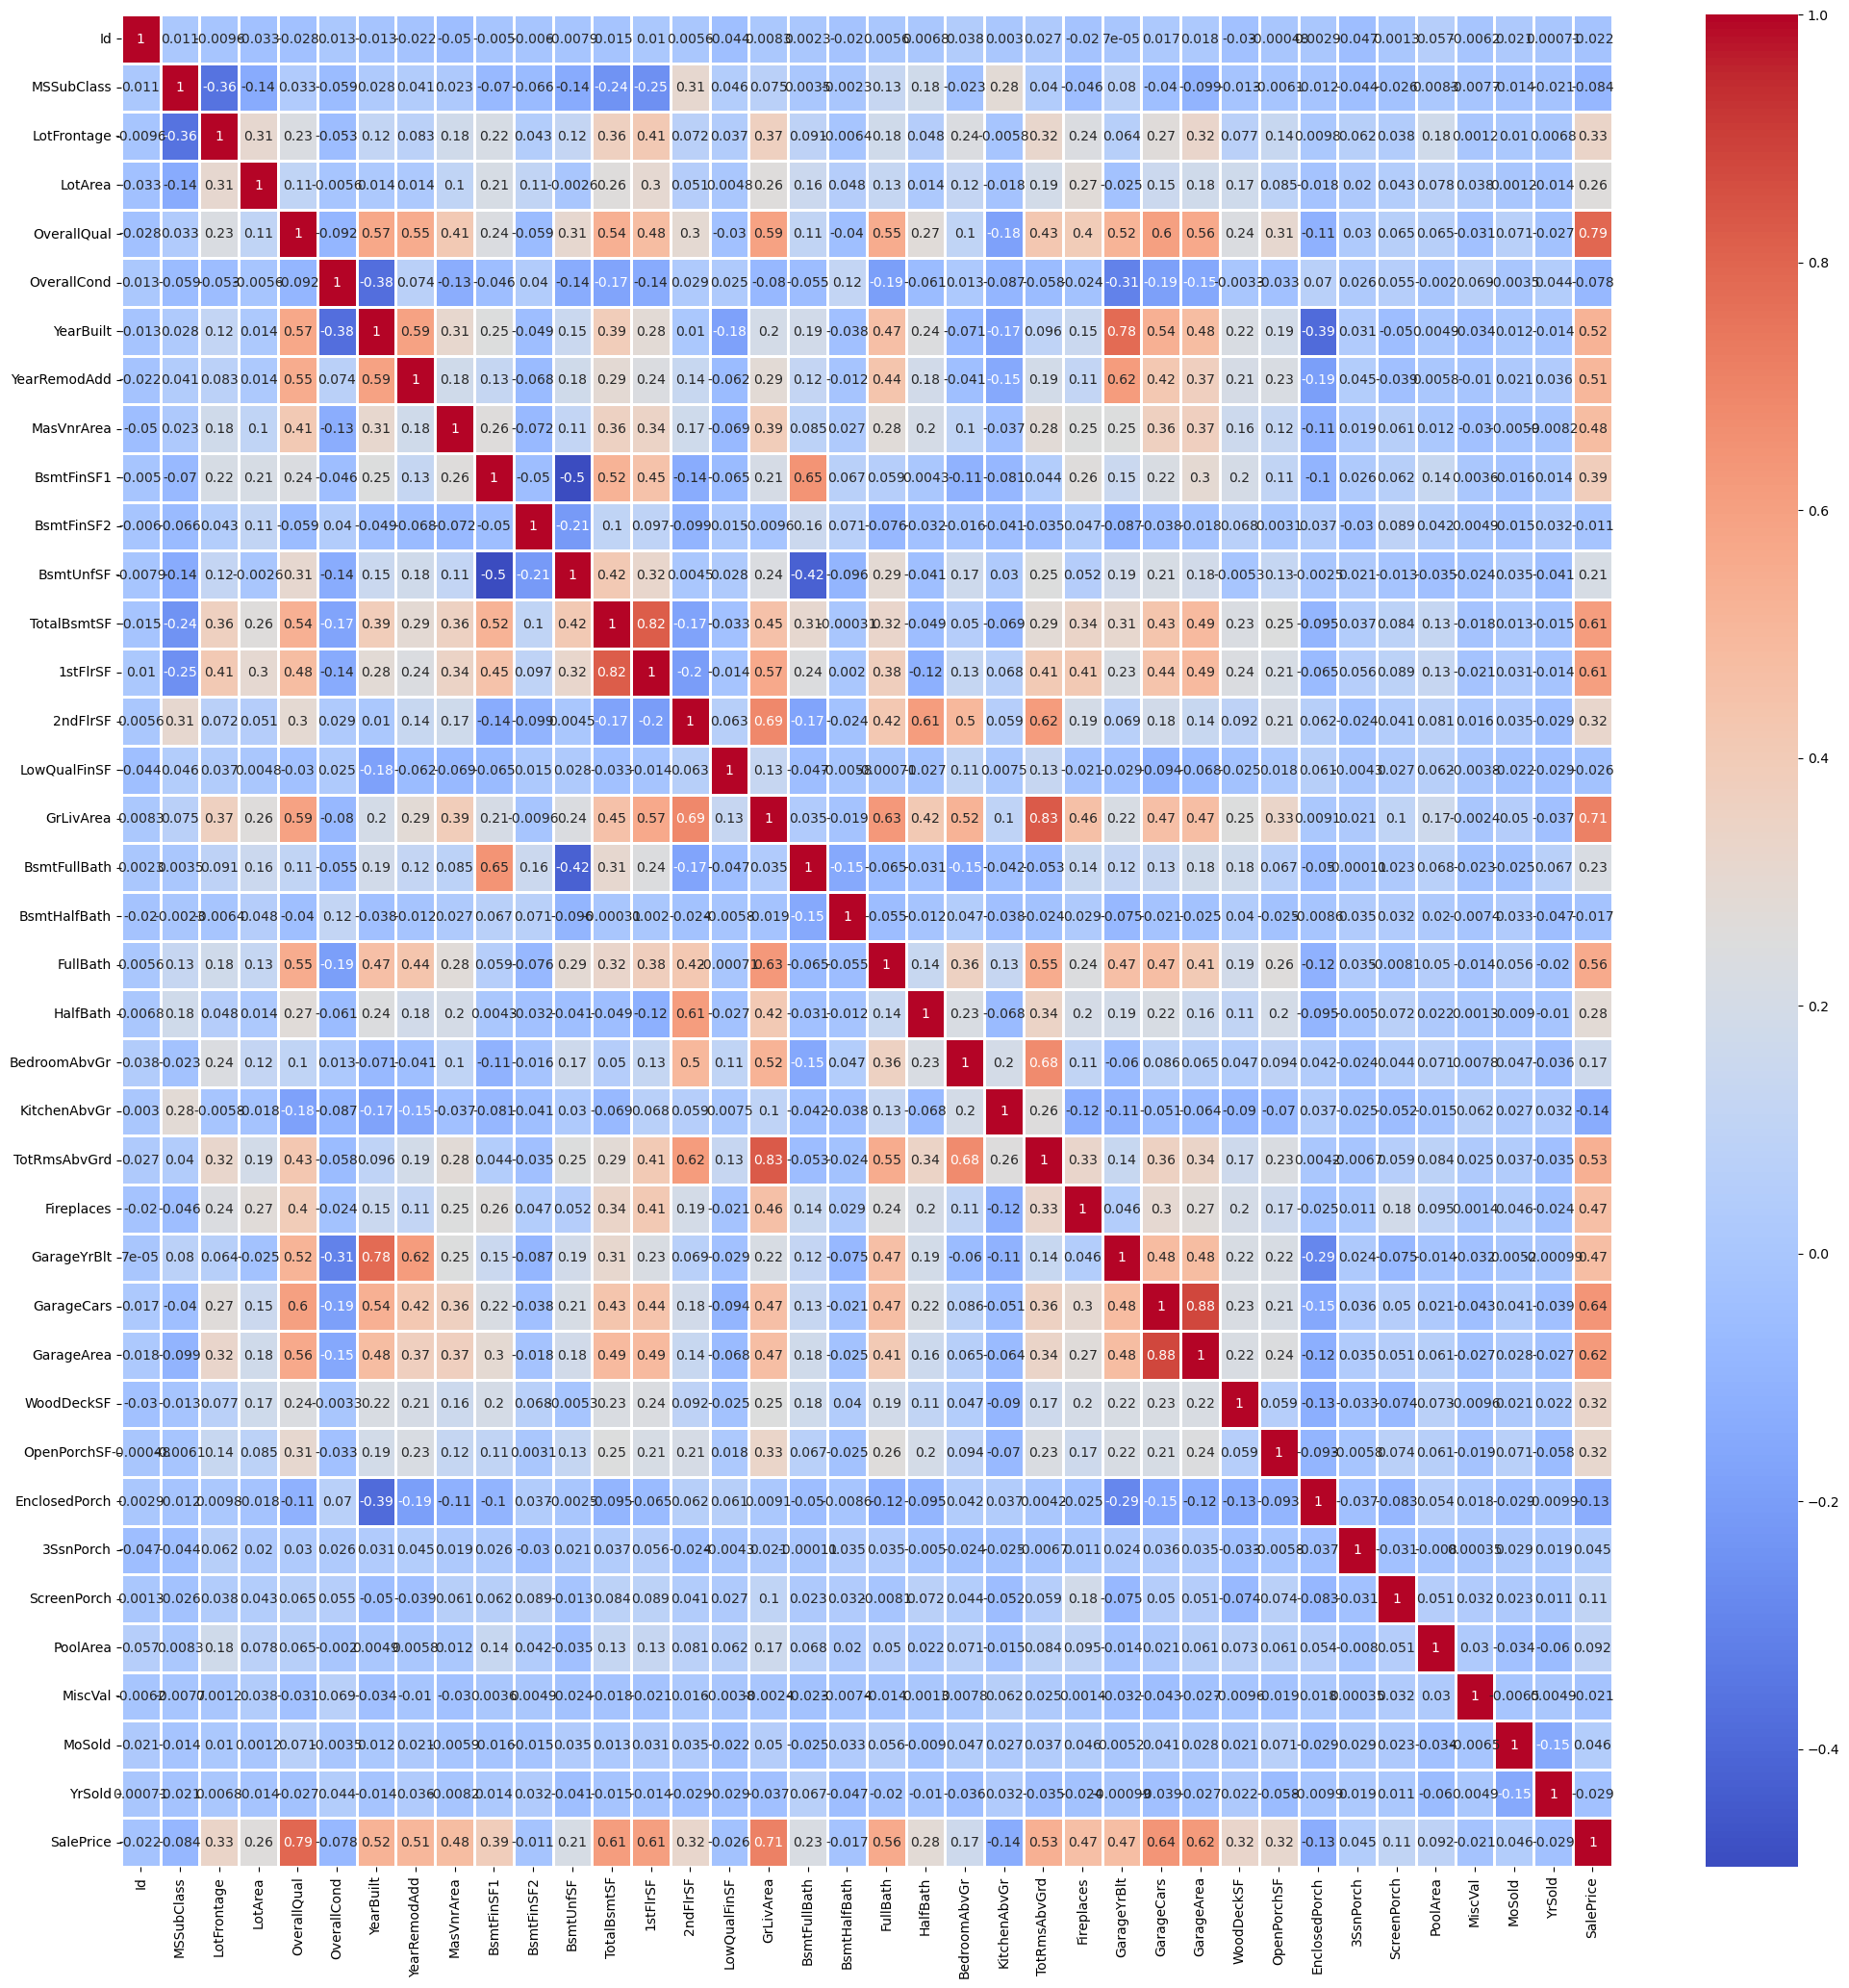

In [593]:
#heatmap
plt.figure(figsize=(25,25))
ax = sns.heatmap(data= dataset.corr(), cmap='coolwarm', annot = True, linewidths=2)

In [594]:
high_corr = dataset.corr()

In [595]:
high_corr_features = high_corr.index[abs(high_corr['SalePrice']) > 0.5]

In [596]:
high_corr_features

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

In [597]:
len(high_corr_features)

11

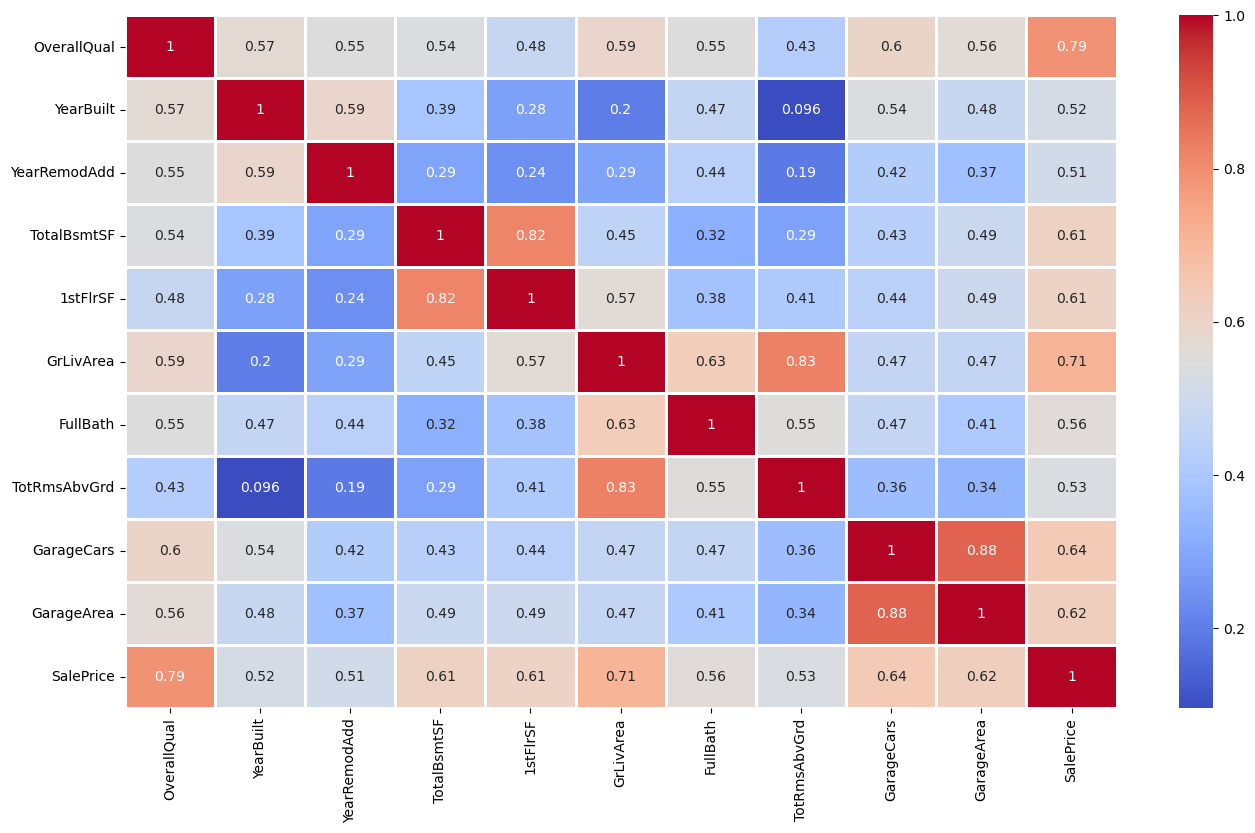

In [598]:
#heatmap for highly correlated features
plt.figure(figsize=(16,9))
ax = sns.heatmap(data= dataset[high_corr_features].corr(), cmap='coolwarm', annot = True, linewidths=2)

## Dealing with Categorical Variables

In [599]:
dataset.shape

(1460, 77)

In [600]:
#categorical columns
dataset.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [601]:
len(dataset.select_dtypes(include='object').columns)

39

In [602]:
dataset= pd.get_dummies(data=dataset, drop_first=True)

In [603]:
dataset.shape

(1460, 238)

In [604]:
# No categorical columns left
dataset.select_dtypes(include='object').columns

Index([], dtype='object')

In [605]:
len(dataset.select_dtypes(include='object').columns)

0

## Splitting the Dataset

In [606]:
# independent variables/' Matrix of features
x = dataset.drop(columns='SalePrice')

In [607]:
# target variable / dependent variable
y = dataset['SalePrice']

In [608]:
from sklearn.model_selection import train_test_split

In [609]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=0)

In [610]:
x_train.shape

(1168, 237)

In [611]:
y_train.shape

(1168,)

In [612]:
x_test.shape

(292, 237)

In [613]:
y_test.shape

(292,)

## Feature Scaling

In [614]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [615]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [616]:
x_train

array([[-0.28399978, -0.86836547,  0.9786782 , ..., -0.10188534,
        -2.20665963,  3.30429529],
       [ 0.31396549, -0.86836547, -0.46715589, ..., -0.10188534,
         0.45317365, -0.30263639],
       [-1.53213363, -0.63114155,  0.4967335 , ..., -0.10188534,
         0.45317365, -0.30263639],
       ...,
       [ 1.13498129,  0.79220197, -0.08160014, ..., -0.10188534,
         0.45317365, -0.30263639],
       [-0.42399958,  1.50387373,  0.01719652, ..., -0.10188534,
         0.45317365, -0.30263639],
       [-0.12738983,  0.08053021, -0.56354483, ..., -0.10188534,
         0.45317365, -0.30263639]])

In [617]:
x_test

array([[-0.49518592, -0.86836547,  0.01719652, ..., -0.10188534,
        -2.20665963, -0.30263639],
       [-0.58535529, -0.15669371,  0.44853903, ..., -0.10188534,
         0.45317365, -0.30263639],
       [-0.66128739, -0.15669371,  0.01719652, ..., -0.10188534,
         0.45317365, -0.30263639],
       ...,
       [ 1.54074343, -0.15669371, -0.46715589, ...,  9.81495458,
        -2.20665963, -0.30263639],
       [ 1.38887924, -0.63114155, -0.94910059, ..., -0.10188534,
         0.45317365, -0.30263639],
       [-1.60569284,  0.43636609, -0.46715589, ..., -0.10188534,
         0.45317365, -0.30263639]])

# Part 2: Building the Model

## 1. Multiple Linear Regression

In [618]:
from sklearn.linear_model import LinearRegression

In [619]:
regressor_mlr = LinearRegression()
regressor_mlr.fit(x_train, y_train)

LinearRegression()

In [620]:
y_pred = regressor_mlr.predict(x_test)

In [621]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-9.198042253663555e+25

## 2. Random Forest Regressor

In [622]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor()
regressor_rf.fit(x_train, y_train)

RandomForestRegressor()

In [623]:
y_pred = regressor_rf.predict(x_test)

In [624]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8284829290630105

## 3. XGBoost Regressor

In [625]:
from xgboost import XGBRFRegressor
regressor_xgb = XGBRFRegressor()
regressor_xgb.fit(x_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=None, reg_alpha=None, ...)

In [626]:
y_pred = regressor_xgb.predict(x_test)

In [627]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8127675751388439

# Part 3: Hyper Parameter Tuning

In [628]:
from sklearn.model_selection import RandomizedSearchCV

In [629]:
parameters = {
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
    'max_depth': [10, 20, 30, 40, 50,60, 70, 80, 90, 100, None],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
    }


In [630]:
parameters

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'max_features': ['auto', 'sqrt'],
 'bootstrap': [True, False]}

In [631]:
random_cv = RandomizedSearchCV(estimator= regressor_rf,
                               param_distributions=parameters,
                               n_iter = 50, cv = 5,
                               verbose = 2, n_jobs = -1, random_state = 0 )

In [632]:
random_cv.fit(x_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=0, verbose=2)

In [633]:
random_cv.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=50, max_features='sqrt',
                      n_estimators=1200)

In [634]:
random_cv.best_params_

{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': False}

# Part 4: Final Model (Random Forest Regressor)

In [635]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(bootstrap=False, max_depth=50, max_features='sqrt',
                      n_estimators=1200, min_samples_split = 2, min_samples_leaf = 1)

regressor.fit(x_train,y_train)

RandomForestRegressor(bootstrap=False, max_depth=50, max_features='sqrt',
                      n_estimators=1200)

In [636]:
y_pred = regressor.predict(x_test)

In [637]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8439783002895185

# Part 5: Testing model on test.csv datatset 

In [638]:
new_dataset = pd.read_csv("test.csv")

In [639]:
new_dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Dealing with Null Values

In [640]:
new_null_percent = new_dataset.isnull().sum()/new_dataset.shape[0] * 100

In [641]:
new_null_percent

Id                0.000000
MSSubClass        0.000000
MSZoning          0.274160
LotFrontage      15.558602
LotArea           0.000000
                   ...    
MiscVal           0.000000
MoSold            0.000000
YrSold            0.000000
SaleType          0.068540
SaleCondition     0.000000
Length: 80, dtype: float64

In [642]:
new_cols_to_drop = new_null_percent[new_null_percent > 50].keys()

In [643]:
new_cols_to_drop

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [644]:
new_dataset = new_dataset.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature'])

In [645]:
new_dataset.shape

(1459, 76)

In [646]:
new_dataset.columns[new_dataset.isnull().any()]

Index(['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'SaleType'],
      dtype='object')

In [647]:
len(new_dataset.columns[new_dataset.isnull().any()])

29

### Dealing with nulls in categorical variables

In [648]:
new_dataset.select_dtypes(include='object').columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [649]:
n_set = set(new_dataset.columns[new_dataset.isnull().any()])
cat_set = set(new_dataset.select_dtypes(include='object').columns)
print(n_set & cat_set)

{'Exterior1st', 'MasVnrType', 'GarageCond', 'MSZoning', 'BsmtQual', 'BsmtCond', 'Exterior2nd', 'KitchenQual', 'GarageQual', 'BsmtExposure', 'Utilities', 'GarageType', 'SaleType', 'BsmtFinType1', 'FireplaceQu', 'Functional', 'BsmtFinType2', 'GarageFinish'}


In [650]:
new_col_names_list = ['Exterior1st', 'MasVnrType', 'GarageCond', 'MSZoning', 'BsmtQual', 'BsmtCond',
                  'Exterior2nd', 'KitchenQual', 'GarageQual', 'BsmtExposure', 'Utilities', 'GarageType',
                  'SaleType', 'BsmtFinType1', 'FireplaceQu', 'Functional', 'BsmtFinType2', 'GarageFinish']
for col_name in new_col_names_list:
  new_dataset[col_name] = new_dataset[col_name].fillna(new_dataset[col_name].mode()[0])

### Dealing with nulls in numerical variables

In [651]:
new_dataset.select_dtypes(include=['int64', 'float64']).columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')

In [652]:
num_set = set(new_dataset.select_dtypes(include=['int64', 'float64']).columns)
print(num_set & n_set)

{'TotalBsmtSF', 'MasVnrArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtFinSF2', 'GarageYrBlt', 'GarageArea', 'BsmtFinSF1', 'BsmtHalfBath', 'LotFrontage'}


In [653]:
col_names_list_2 = ['TotalBsmtSF', 'MasVnrArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtFinSF2', 'GarageYrBlt',
                    'GarageArea', 'BsmtFinSF1', 'BsmtHalfBath', 'LotFrontage']
for col_name in col_names_list_2:
 new_dataset[col_name] = new_dataset[col_name].fillna(new_dataset[col_name].mean())


In [654]:
len(new_dataset.columns[new_dataset.isnull().any()])

0

In [655]:
len(new_dataset.select_dtypes(include='object').columns)

39

In [656]:
new_dataset.shape

(1459, 76)

## Dealing with Categorical variables

In [657]:
new_dataset= pd.get_dummies(data=new_dataset, drop_first=True)

In [658]:
len(new_dataset.select_dtypes(include='object').columns)

0

In [659]:
new_dataset.shape

(1459, 221)

## Making the Features in train.csv and test.csv equal i.e 237

In [660]:
# Get missing columns in the training test
missing_cols = set( x.columns ) - set( new_dataset.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    new_dataset[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
new_dataset = new_dataset[x.columns]

In [661]:
new_dataset.shape

(1459, 237)

In [662]:
house_id = new_dataset['Id']

In [663]:
house_id

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

## Feature Scaling

In [664]:
new_dataset = sc.transform(new_dataset)

In [665]:
new_dataset

array([[ 1.71396353, -0.86836547,  0.4967335 , ..., -0.10188534,
         0.45317365, -0.30263639],
       [ 1.71633641, -0.86836547,  0.54492797, ..., -0.10188534,
         0.45317365, -0.30263639],
       [ 1.71870929,  0.08053021,  0.20756668, ..., -0.10188534,
         0.45317365, -0.30263639],
       ...,
       [ 5.16887396, -0.86836547,  4.35229109, ..., -0.10188534,
        -2.20665963, -0.30263639],
       [ 5.17124683,  0.67359001, -0.37076695, ..., -0.10188534,
         0.45317365, -0.30263639],
       [ 5.17361971,  0.08053021,  0.20756668, ..., -0.10188534,
         0.45317365, -0.30263639]])

## Prediction

In [666]:
new_y_pred = regressor.predict(new_dataset)

## Creating csv file for Final Submission

In [667]:
house_id_list = list(house_id)
house_id_list

[1461,
 1462,
 1463,
 1464,
 1465,
 1466,
 1467,
 1468,
 1469,
 1470,
 1471,
 1472,
 1473,
 1474,
 1475,
 1476,
 1477,
 1478,
 1479,
 1480,
 1481,
 1482,
 1483,
 1484,
 1485,
 1486,
 1487,
 1488,
 1489,
 1490,
 1491,
 1492,
 1493,
 1494,
 1495,
 1496,
 1497,
 1498,
 1499,
 1500,
 1501,
 1502,
 1503,
 1504,
 1505,
 1506,
 1507,
 1508,
 1509,
 1510,
 1511,
 1512,
 1513,
 1514,
 1515,
 1516,
 1517,
 1518,
 1519,
 1520,
 1521,
 1522,
 1523,
 1524,
 1525,
 1526,
 1527,
 1528,
 1529,
 1530,
 1531,
 1532,
 1533,
 1534,
 1535,
 1536,
 1537,
 1538,
 1539,
 1540,
 1541,
 1542,
 1543,
 1544,
 1545,
 1546,
 1547,
 1548,
 1549,
 1550,
 1551,
 1552,
 1553,
 1554,
 1555,
 1556,
 1557,
 1558,
 1559,
 1560,
 1561,
 1562,
 1563,
 1564,
 1565,
 1566,
 1567,
 1568,
 1569,
 1570,
 1571,
 1572,
 1573,
 1574,
 1575,
 1576,
 1577,
 1578,
 1579,
 1580,
 1581,
 1582,
 1583,
 1584,
 1585,
 1586,
 1587,
 1588,
 1589,
 1590,
 1591,
 1592,
 1593,
 1594,
 1595,
 1596,
 1597,
 1598,
 1599,
 1600,
 1601,
 1602,
 1603,

In [668]:
sale_price_list = list(new_y_pred)
sale_price_list

[130805.32083333333,
 153262.66166666665,
 188347.14083333334,
 192931.0625,
 196363.8225,
 186020.33416666667,
 173937.24083333334,
 178060.905,
 185280.88416666666,
 131563.5525,
 210501.475,
 100211.87416666666,
 106119.22583333333,
 157741.49666666667,
 119152.08666666667,
 375473.605,
 265113.9225,
 306139.83416666667,
 298622.2925,
 473185.8908333333,
 321322.72,
 208273.1875,
 186270.635,
 179161.9,
 182767.94333333333,
 196114.15833333333,
 324046.0341666667,
 244222.9875,
 221034.26416666666,
 224172.0375,
 194914.51,
 102035.9975,
 189469.29583333334,
 307451.2991666667,
 295773.015,
 241148.59583333333,
 186329.54583333334,
 163334.55333333334,
 159439.15833333333,
 167507.5425,
 175249.94416666665,
 170385.91166666665,
 279454.67833333334,
 234969.335,
 222592.95416666666,
 186795.85083333333,
 253589.70916666667,
 199433.0525,
 158823.96333333335,
 152318.08416666667,
 152342.91666666666,
 176416.34833333333,
 143359.35416666666,
 166521.03666666665,
 195875.86666666667,
 

In [669]:
final_data = {'Id': house_id_list,
       'SalePrice':sale_price_list}

In [670]:
final_df = pd.DataFrame(final_data)

In [671]:
final_df

,Id,SalePrice
0,1461,130805.320833
1,1462,153262.661667
2,1463,188347.140833
3,1464,192931.062500
4,1465,196363.822500
...,...,...
1454,2915,89859.353333
1455,2916,91565.788333
1456,2917,165785.897500
1457,2918,118002.335000


In [672]:
final_df.to_csv('final_submission_test_dataset.csv', index=False)